<a href="https://colab.research.google.com/github/fkofkf431/Netflix-Movies-and-TV-Shows-Clustering-capstone-project/blob/main/Netflix_Movies_and_TV_Shows(Clustering)_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title-Netflix Movies and TV Shows Clustering**

***Name-***Mohd Firoz Chaudhri

***Contribution-***Individual

# **Problem Description-**

In this project, the goal is to analyze and cluster a dataset of Netflix movies and TV shows. The dataset contains various attributes such as title, description, release year, duration, genres, and more. The objective is to group similar content items together into clusters based on their attributes. This clustering can provide insights into the underlying patterns and relationships between different types of content available on the platform.

# **Data Description**

The dataset comprises a collection of Netflix movies and TV shows, each represented by various attributes.

**Attributes**

Show_ID: A unique identifier for each content entry.

Type: Denotes whether the entry is a movie or TV show.

Title: The title of the content.

Director: The director's name (if applicable).

Cast: List of actors or characters (if applicable).

Country: The country of origin.

Date_Added: The date the content was added to Netflix.

Release_Year: The year the content was released.

Rating: The content's rating.

Duration: The duration in terms of seasons or minutes.

Listed_In: The genre(s) the content is categorized under.

Description: A brief synopsis of the content's plot.

# **Objective**

The objective of this dataset is to explore and analyze the content attributes to uncover patterns, trends, and potential clusters within the Netflix movies and TV shows. By utilizing clustering techniques, we aim to group similar content items together based on shared attributes. This analysis can provide valuable insights for content recommendation, trend analysis, and understanding user preferences on the platform.

# **Github Link**

In [94]:
#Importing libraries that are required
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [95]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#loading dataset
df=pd.read_csv('/content/drive/MyDrive/Netflix dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [97]:
#check first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [98]:
#check last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [99]:
#check random 10 rows
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2165,s2166,Movie,Final Destination 3,James Wong,"Mary Elizabeth Winstead, Ryan Merriman, Kris L...","United States, Germany","January 1, 2020",2006,R,93 min,Horror Movies,When a girl prevents her premonition of a dead...
2466,s2467,Movie,Goldie,Sam de Jong,"Slick Woods, George Sample III, Shaquila Angel...",United States,"June 22, 2020",2019,TV-MA,89 min,Dramas,When a bold teen mounts a gritty pursuit to da...
3367,s3368,Movie,Kicking and Screaming,Noah Baumbach,"Josh Hamilton, Olivia d'Abo, Carlos Jacott, Ch...",United States,"November 4, 2019",1995,R,97 min,"Comedies, Independent Movies, Romantic Movies","After graduating, four college roomies – petri..."
2636,s2637,Movie,Harry and Snowman,Ron Davis,Harry DeLeyer,United States,"January 15, 2017",2015,TV-PG,83 min,"Documentaries, Sports Movies","With only a strong will and a cheap horse, a f..."
3941,s3942,TV Show,Marianne,NaN,"Victoire Du Bois, Lucie Boujenah, Tiphaine Dav...",France,"September 13, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror","Lured back to her hometown, a famous horror wr..."
2064,s2065,Movie,Exit Wounds,Andrzej Bartkowiak,"Steven Seagal, DMX, Isaiah Washington, Anthony...",United States,"October 1, 2019",2001,R,101 min,Action & Adventure,Maverick cop Orin Boyd joins forces with an un...
7292,s7293,TV Show,Typewriter,NaN,"Aarna Sharma, Aaryansh Malviya, Mikail Gandhi,...",India,"July 19, 2019",2019,TV-MA,1 Season,"International TV Shows, TV Horror, TV Mysteries",Three young friends in Goa plan to search an o...
7000,s7001,Movie,The Willoughbys,Kris Pearn,"Will Forte, Maya Rudolph, Ricky Gervais, Aless...","Canada, United States, United Kingdom","April 22, 2020",2020,PG,92 min,"Children & Family Movies, Comedies",Four siblings with horribly selfish parents ha...
13,s14,Movie,"2,215",Nottapon Boonprakob,Artiwara Kongmalai,Thailand,"March 1, 2019",2018,TV-MA,89 min,"Documentaries, International Movies, Sports Mo...",This intimate documentary follows rock star Ar...
6078,s6079,Movie,The American Game,Mostafa Abu Seif,"Nahed El Sebaï, Ahmed Fahmi, Shaima Saif, Bayo...",NaN,"October 1, 2020",2019,TV-PG,91 min,"Comedies, International Movies, Romantic Movies",A financially struggling young couple's relati...


In [100]:
#lets check shape of the dataset
df.shape

(7787, 12)

So we have 7787 rows and 12 columns in our dataset.

In [101]:
#check information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [102]:
#check columns in our dataset
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# **Data Preprocessing**

Data preprocessing is the initial step in the data analysis process where raw data is prepared and transformed into a clean, organized, and usable format.  Data preprocessing involves cleaning, organizing, and getting the data ready for analysis or modeling. It helps ensure that the data is accurate, relevant, and in a form that can provide meaningful insights or predictions.

In [103]:
#check duplicate values
df.duplicated().sum()

0

So we found no duplicate value in our dataset

In [104]:
#Check null values in our dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

So in our dataset we found that director column has 2389 null values,cast column has 718 null values, country column has 507 null values,date_added column has 10 null values and rating has null values.

**Handling null values**

In our dataset director column has more null values,so we will drop this column.And date added and ratings is not necessary column for us,so we will also drop these columns.Cast and country is important column to us,so we will fill missing values in these columns.

In [105]:
#Drop director,date_added and rating columns from our dataset
df.drop(['director','cast'],axis=1,inplace=True)

In [106]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [107]:
#fill missing values in cast and country columns
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [108]:
#date_added and rating contains an insignificant portion of the data so we will drop them from dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [109]:
#Again check null values
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now we found that we have no null values in our dataset.

# **EDA(Exploratory Data Analysis)**

EDA is about exploring and getting to know your data. You look at your data, create visualizations, calculate simple statistics, and try to understand the patterns, trends, and interesting things about it. EDA helps you become familiar with your data's story before you dive into more detailed analysis or modeling.

***Count of movies and tv shows***

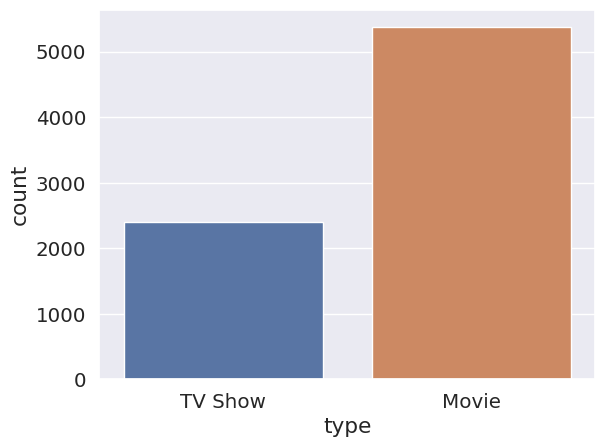

In [110]:
#Visualize the number of movies and tv shows
#convert data type in to string if it is not
df['type']=df['type'].astype(str)
#handling missing value
df['type'].fillna('Unknown',inplace=True)
#map incorrect values to the correct values
df['type'].replace({'TV Show':'TV Show'},inplace=True)
#Now visualize
sns.countplot(data=df,x='type')
plt.show()

From above plot we can see that movies are more popular than tv shows.

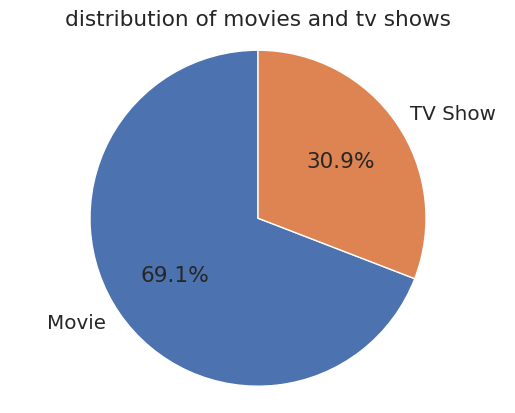

In [111]:
#Making a pie chart to know the percentage of tv show and movies
type_counts=df['type'].value_counts()
labels=type_counts.index
sizes=type_counts.values

plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('distribution of movies and tv shows')
plt.axis('equal')
plt.show()

From above pie chart we found that around 30% tv shows and around 69% movies are popular on netflix.

In [112]:
#Now create two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

***Which category has highest ratings***

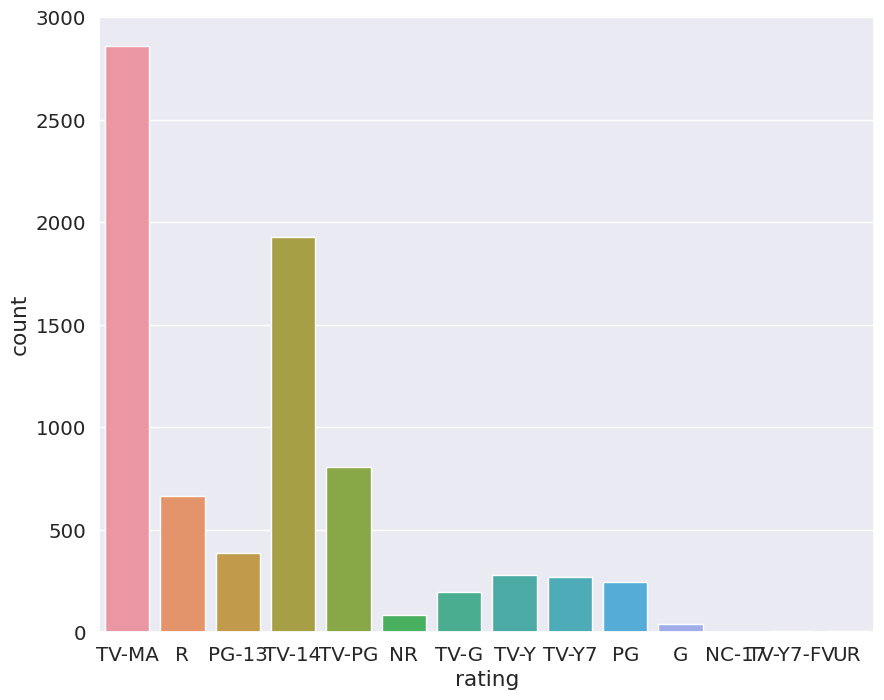

In [113]:
#lets us check which category has the highest ratings
fig,ax=plt.subplots(figsize=(10,8))
sns.countplot(data=df,x='rating')
plt.show()

From above barplot we found that TV_MA is the highest ratings and G is the lowest ratings.

***In which year the maximum numbers of movies released***

In [114]:
df['release_year'].value_counts().sort_index(ascending=False)

2021      31
2020     868
2019     996
2018    1120
2017    1010
        ... 
1945       3
1944       3
1943       3
1942       2
1925       1
Name: release_year, Length: 73, dtype: int64

In [117]:
movies_year=movies['release_year'].value_counts().sort_index(ascending=False)


In [118]:
tvshows_year=tv_shows['release_year'].value_counts().sort_index(ascending=False)

Text(0.5, 1.02, 'production growth based on years')

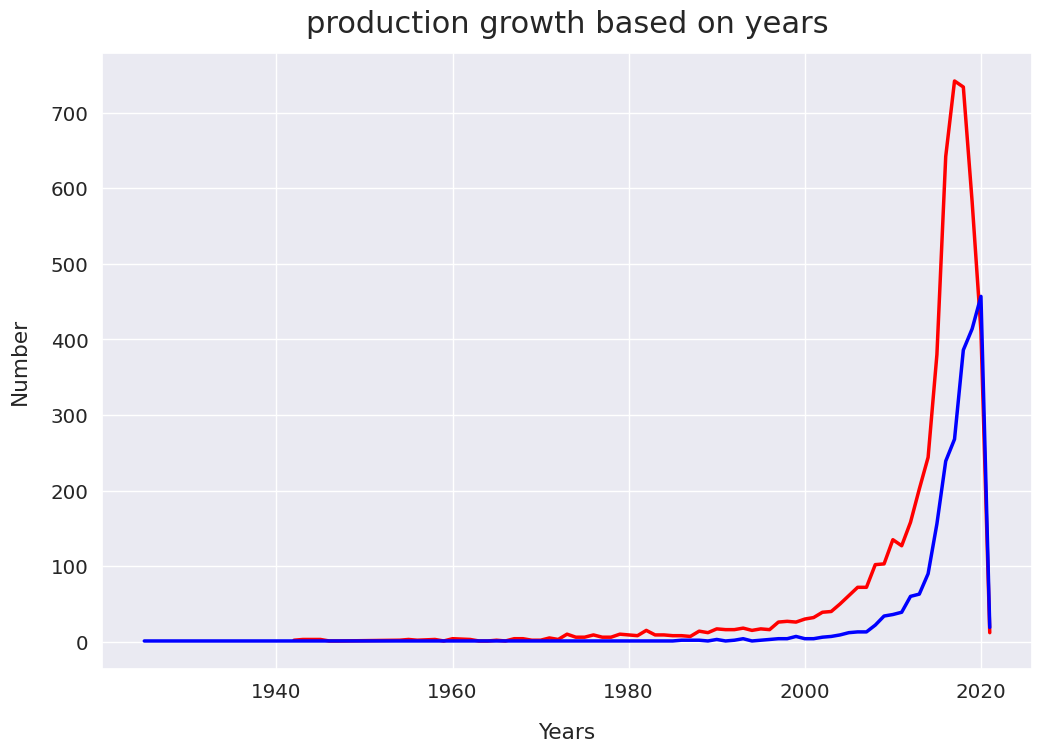

In [119]:
#Visualization the movies and tv shows based on their released year
sns.set(font_scale=1.3)
movies_year.plot(figsize=(12,8),linewidth=2.5,color='red',label='Movies/year',ms=3)
tvshows_year.plot(figsize=(12,8),linewidth=2.5,color='blue',label='TV Shows/year')
plt.xlabel('Years',labelpad=15)
plt.ylabel('Number',labelpad=15)
plt.title('production growth based on years',y=1.02,fontsize=22)

Red color shows the growth year of movies and blue color shows the growth year of tv shows.As we can see from the graph that as increasing of years also increasing the graph of movies and tv shows.But the popularity of tv shows is less as compare to movies on netflix.

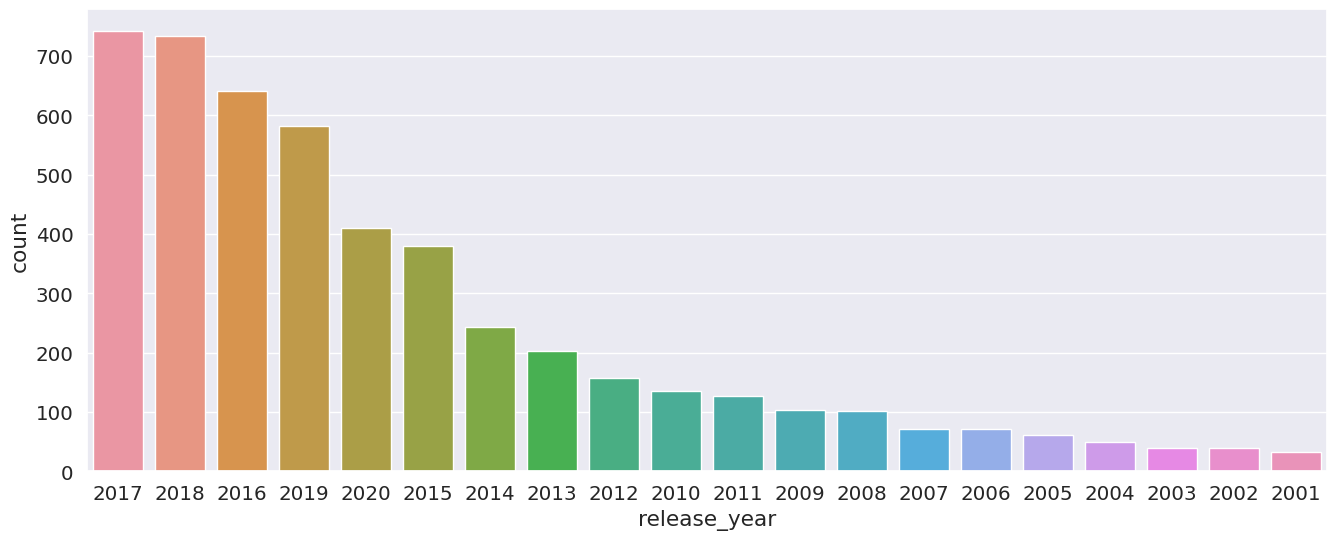

In [122]:
#Analysing how many movies are released every year in last 20 years
plt.figure(figsize=(16,6))
sns.countplot(x=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])
plt.show()

From above graph we can see that as year increasing the releasing of movies per year is also increasing.So we can say that maximum number of movies released in year 2017.

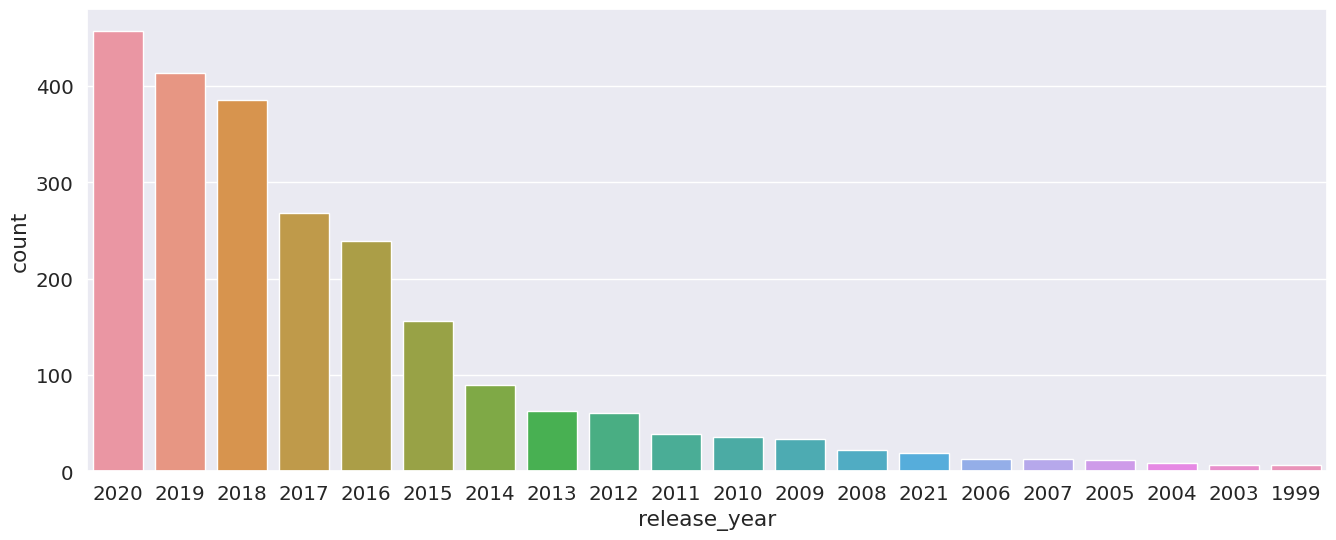

In [123]:
#Let see how many tv shows are released in past 20 years
plt.figure(figsize=(16,6))
sns.countplot(x=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])
plt.show()

From this as we can that as like movies growth of tv shows is also increasing of increasing years.So we can see that maximum number of tv show released in year 2020.

***Which genre is more popular***

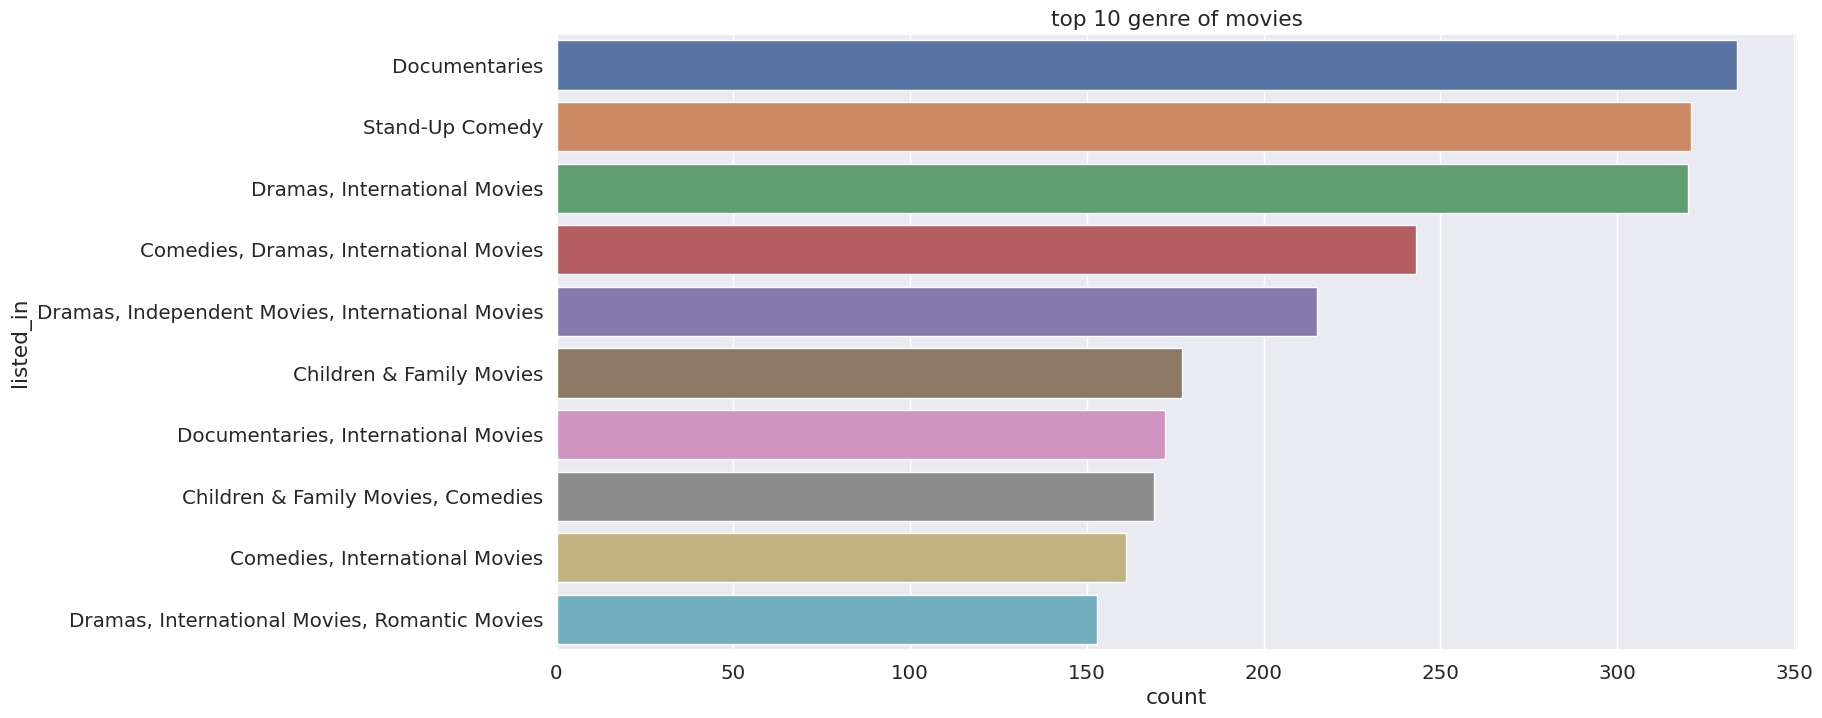

In [124]:
#Analysing top 10 genre of the movies
plt.figure(figsize=(16,8))
plt.title('top 10 genre of movies')
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])
plt.show()

From graph we can see that documentry is more popular than the other categories.

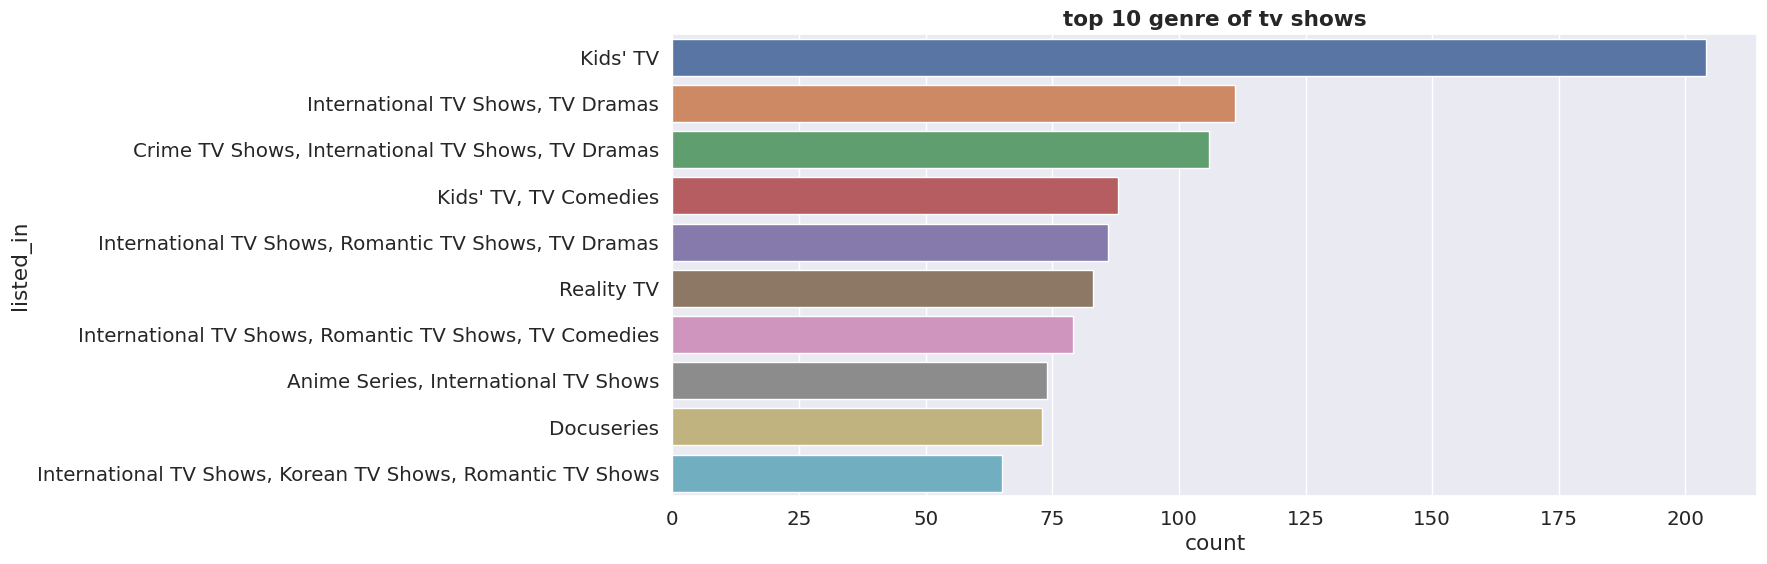

In [126]:
#Analysing top 10 genre of movies
plt.figure(figsize=(14,6))
plt.title('top 10 genre of tv shows',fontweight='bold')
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])
plt.show()

From this graph we can see that kids TV is more popular in tv shows,accordingly other tv shows.

***Lets check which season has the maximum duration***

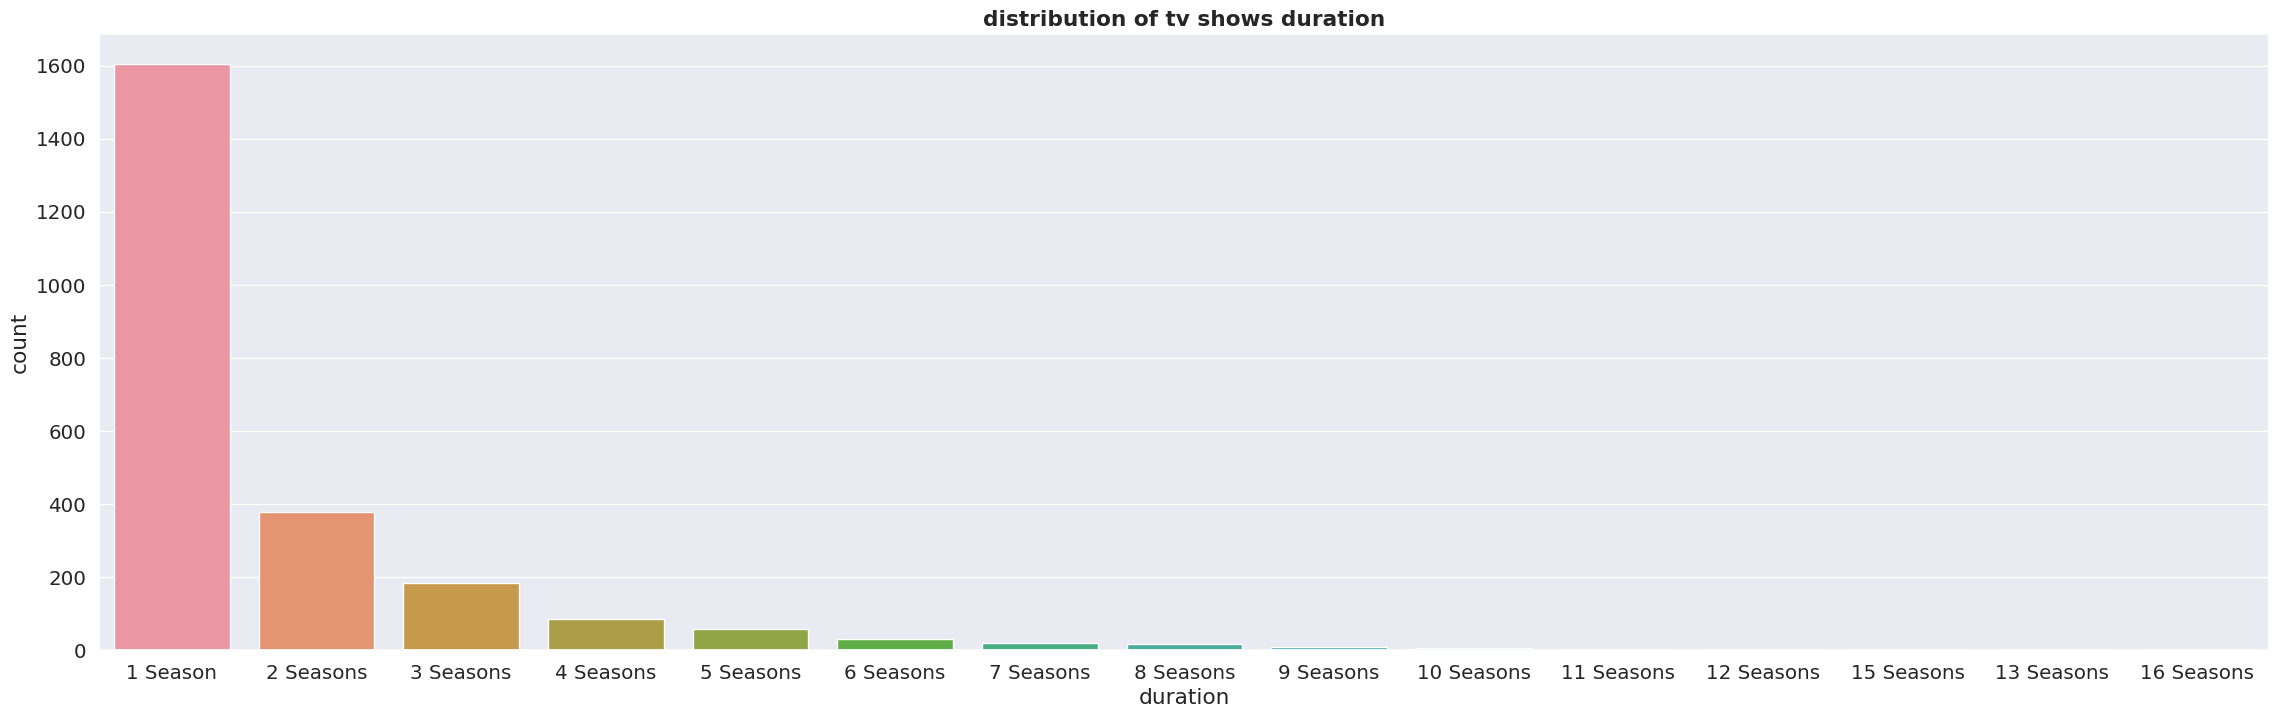

In [127]:
#lets check distribution of tv shows
plt.figure(figsize=(28,8))
plt.title('distribution of tv shows duration',fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order=tv_shows['duration'].value_counts().index)
plt.show()

So from above graph we see that season 1 is more duration than the other season.